<a href="https://colab.research.google.com/github/anaiy2004/COVID-19-Forecasting/blob/main/COVID19_CasesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import csv
import keras
import pandas
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras import optimizers
import numpy as np
import tensorflow as tf
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint

url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
df = pandas.read_csv(url)
inputs = df['cases'].to_numpy()             
outputs = df['deaths'].to_numpy()
df.tail(5)
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
df['days'] = days

In [22]:
past = 7
s = (len(inputs) , past  * 2)
betterinputs = np.zeros(s)
betteroutputs = np.zeros(len(inputs))

for i in range(len(inputs) - past): # - 0
  temp = np.zeros(past * 2)
  temp[0 : past] = inputs[i : i+ past]
  temp[past:] = outputs[i : i + past] 
  betterinputs[i] = temp
  betteroutputs[i] = inputs[i+past] # + 0

In [23]:
betterinputs = betterinputs[0:len(df) - past] # - 0
betteroutputs = betteroutputs[0:len(df) - past]
days = days[0:len(df) - past]

In [24]:
from matplotlib import pyplot as plt
split = int(0.8*len(betterinputs))
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
X_train = np.expand_dims(X_train, axis=2)  
X_test = np.expand_dims(X_test, axis=2) 
days = days[split:]

7313.953725263262


array([0.99979088, 0.99921467])

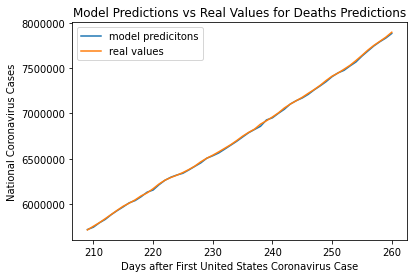

In [25]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
model = RidgeCV(cv = 2)
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
model.fit(X_train, y_train)
print("{}".format(np.linalg.norm(model.predict(X_test) - y_test, 1)/len(y_test)))
predict = model.predict(X_test)
plt.title("Model Predictions vs Real Values for Deaths Predictions")
plt.ticklabel_format(style='plain')
plt.plot( days, predict, label = "model predicitons")
plt.plot( days, y_test,  label = "real values")
plt.xlabel("Days after First United States Coronavirus Case")
plt.ylabel("National Coronavirus Cases")
plt.legend()
cross_val_score(model, X_train, y_train, cv = 2)


In [26]:
model.score(X_test, y_test)

0.9998105327245571